In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


This notebook will feature notes and discussion on Part II of Kutner (2004) Applied Linear Statistical Models, which focuses on topics of Multiple Linear Regression.

### Chapter 6 Multiple Regression I

An example of a first-order multiple regression model is given by the following:

$$
Y_i = \beta_0 + \beta_1X_{i1} + \beta_2X_{i2} + \epsilon_i,
$$

where it's expected value, $E[Y_i] = \beta_0 + \beta_1X_{i1} + \beta_2X_{i2}$, gives a *response surface* or *regression surface*, which in this case is a plane. In general, first order models, with *p - 1* predictors, can be written as

$$
Y_i = \sum_{k=1}^{p-1}\beta_{k}X_{ik} + \epsilon_i,
$$

where we define $X_{i0} = 1$.

This type of model is the *general linear regression model*, where the response variables $Y_i$ are normally distributed with $E[Y_i] = \sum_{k=1}^{p-1}\beta_kX_{ik}$ and constant variance $\sigma^2$. This model assumes each predictor has an additive effect with no interactions.

The general linear model encompasses models with transformed variables, where we take $Y_i'$ rather than $Y_i$, or with interaction effects, where we can take $X_{i3} = X_{i1}X_{i2}$.

The term *linear* can be seen to refer to the paramaters and not the response surface itself, which may be non-linear and quite complex. Therefore, linear regression model can be written in the form:

$$
Y_i = \sum_k c_{ik}\beta_k + \epsilon_i
$$

In matrix form, our model is 

$$ 
\mathbf{Y} = \mathbf{X\beta} + \mathbf{\epsilon}
$$

Recall, our normal equations from minimizing $Q$ are:

\begin{align}
\sum_i Y_i &= n b_1 + b1\sum_i X_i \\
\sum_iX_iY_i &= b_0\sum_iX_i + \sum_ib_1X_i^2 \\
\mathbf{X'Y} &= \mathbf{X}'\mathbf{Xb},
\end{align}

sine we define $\mathbf{X}$ in this case as 

\begin{bmatrix}
    1 & X_1 \\
    1 & X_2 \\ 
    \vdots & \vdots \\
    1 & X_n
\end{bmatrix}

In the case of our general linear model, the likelihood function is 

$$
\mathbf{L}(\mathbf{\beta}, \sigma^2) = \frac{1}{(2\pi\sigma^2)^{n/2}} \exp\big(Y_i - \Sigma_k(\beta_kX_{ik})\big)^2,
$$

which can be maximized and gives the multi-variate counterpart of the normal equations described above

$$
\mathbf{b} = \mathbf{X'X}^{-1}\mathbf{X'Y}
$$
    
As before, we express our estimated values as 

$$
\mathbf{\hat{Y}} = \mathbf{Xb} = \mathbf{X(X'X)^{-1}X'Y} = \mathbf{HY}.
$$

Similarly, our residuals are

$$ 
\mathbf{e} = \mathbf{(I - H)Y}
$$

and, because $(\mathbf{I-H})$ is idempotent

$$
\sigma^2\{\mathbf{e}\} = \sigma^2(\mathbf{I-H})
$$

The **Coefficient of Determination** can only increase with the addition of more X variables, as the SSE can never be larger with more X variables, and SSTO never changes.

**Inferences about Regression Parameters**

The $\mathbf{E[b]} = \mathbf{\beta}$ and $\sigma^2\{\mathbf{b}\} = \sigma^2(\mathbf{X'X})^{-1}$, which is estimated by substituting MSE for $\sigma^2$.

Interval estimation and tests for $b_k$ proceed as described previously for simple linear regression.

To estimate a new mean value $\hat{Y_h}$, we evaluate $\mathbf{X}_h'\mathbf{b}$, where $\mathbf{X}_h = [1, X_{h1}, X_{h2}, ... X_{h,p-1}]'$. Thus,

\begin{align}
E[Y_h] &= \mathbf{X}_h'\mathbf{\beta} \\
\sigma^2\{Y_h\} &= \mathbf{X_h}'\sigma^2\{\mathbf{b}\}\mathbf{X_h} = \mathbf{X_h'(X'X)^{-1}X_h}
\end{align}

**Remedial Measures and Diagnostics**

It is good practice to compare the correlation between the Y's and X's and between the X's themselves as well. Examine residuals against each predictor and over time. Perform F test for lack of fit.

In [2]:
X1 = [68.5, 45.2, 91.3, 47.8, 46.9, 66.1, 49.5, 52, 48.9, 38.4, 87.9, 72.8, 88.4, 42.9, 52.5, 85.7, 41.3, 51.7, 89.6, 82.7, 52.3]
X2 = [16.7, 16.8, 18.2, 16.3, 17.3, 18.2, 15.9, 17.2, 16.6, 16, 18.3, 17.1, 17.4, 15.8, 17.8, 18.4, 16.5, 16.3, 18.1, 19.1, 16]
Y = [174.4, 164.4, 244.2, 154.6, 181.6, 207.5, 152.8, 163.2, 145.4, 137.2, 241.9, 191.1, 232, 145.3, 161.1, 209.7, 146.4, 144, 232.6, 224.1, 166.5]

X = np.transpose(np.matrix([np.ones(np.shape(X1)), np.transpose(X1), np.transpose(X2)]))

/usr/local/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


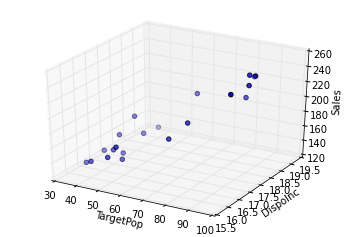

In [3]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X1, X2, Y, 'ko')
ax.set_xlabel('TargetPop')
ax.set_ylabel('DispoInc')
ax.set_zlabel('Sales')
plt.show()

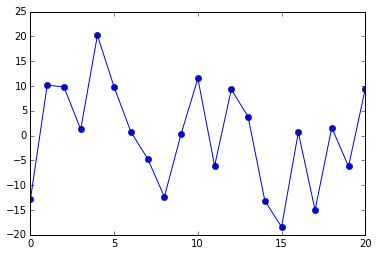

In [4]:
# We estimate b with inv(X'X)*X'Y
Y = np.matrix(Y)
b = np.linalg.inv(np.transpose(X)*X)*np.transpose(X)*np.transpose(Y)
e = np.transpose(Y) - X*b
plt.plot(e, marker='o')

### Chapter 7 Multiple Regression II

This chapter covers topics including: extra sums of squares, standardized regression, and collinearity.

**Extra Sum of Squares**

Measures the marginal reduction in the error sum of squares when one or more predictor variables are added to the model, given the presence of certain other predictor variables. Reducing the SSE will lead to an increase in SSR because SSTO = SSE + SSR.

The Extra Sum of Squares is used to test whether regression coefficients can be dropped from the model. We know that one way to test this is with the test statistic

$$
t^* = \frac{b_k}{s\{b_k\}}
$$

Equivalently we can use the *general linear test* approach.

Consider the **full** model, 

$$
Y_i = \beta_0 + \beta_1X_{i1} + \beta_2X_{i2} + \beta_3X_{i3} + \epsilon
$$

where we want to test whether $\beta_3 = 0$ or not.

The **reduced** model would then be

$$
Y_i = \beta_0 + \beta_1X_{i1} + \beta_2X_{i2} + \epsilon
$$

and the relevant SSE's would be SSE(F) = SSE($X_1, X_2, X_3$) and SSE(R) = SSE($X_1, X_2$). 

We use the $F^*$ statistic, where in this case

\begin{align}
F^* = \frac{SSE(R)-SSE(F)}{df_R - df_F} \div \frac{SSE(F)}{df_F} =& \frac{SSE(X_1,X_2)-SSE(X_1,X_2,X_3)}{df_R - df_F} \div \frac{SSE(X_1, X_2, X_3)}{df_F} \\
&= \frac{SSR(X_3 | X_1, X_2)}{1} \div \frac{SSE(X_1,X_2,X_3)}{df_F} = \frac{MSR(X_3|X_1,X_2)}{MSE(X_1,X_2,X_3)}
\end{align}

To test subsets of coefficients at a time, simply use the appropriate marginal test with corresponding SSE.

Similarly, there are *coefficients of partial determination*, for example $R^2_{Yi|j}$, but this can be extended to include more than one given variable. These CoPD quantify the fraction reduction in SSE when one variable is added given the presence of other predictors.

**Standardized Regression Model**

Roundoff errors in computation of normal equations can be a problem with large numbers of variables, particularly when taking the inverse of $\mathbf{X'X}$. One cause of these errors is if the variables are of different magnitudes and so $\mathbf{X'X}$ covers a wide range. In this case, the correlation transformation is useful. This transformation is also useful as regression coefficients can then be compared with one another, as they will be in the same units.


**Multicollinearity** 

Refers to the case where the response and/or predictor variables are correlated amongst themselves. 

When the predictor variables are uncorrelated, the coefficients $\beta_i$ attain the same values regardless of which subset of uncorrelated predictor variables is included. Additionally, the marginal contribution of one predictor variable in reducing the error sum of squares when it is added to a model with other predictors is the same as its contribution when modeled alone.

When two predictor variables are perfectly correlated and there is no random error in the response variable, to take an idealized example, there will be infinitely many possible response surfaces to fit. In a more realistic scenario, the regression coefficients will have very high sampling variability. Essentially, the simple interpretation of coefficients modeling marginal effects, while other predictors are held constant, on the response is no longer valid with multicollinearity.

A further issue comes in testing the $\beta_k$ and trying to determine whether there is a regression relation. The overall F test for whether all $\beta_k = 0$ would show a regression relation, but performing the marginal $t^*$ tests on each $\beta_k$ individually would suggest that each is equal to zero because their marginal contribution given the presence of the other predictors (with which they are correlated) would be quite small.

### Chapter 8: Regression Models for Quantitative and Qualitative Predictors

In this chapter we focus on methods for modeling with quantitative predictors, qualitative predictors and combinations of the two. We introduce interaction and polynomial terms for the quantitative models and indicator variables for the qualitative predictors.

**Polynomial Regression Models**

In general, polynomial models provide good approximations to curvilinear response functions. However, there is a major risk with extrapolation in these models beyond the range of the fitted data.

*Single Predictor, Second Order*

Here our model is:

\begin{align}
Y_i &= \beta_0 + \beta_1x_i + \beta_2x^2_i + \epsilon_i, where \\
x_i &= X_i - \bar{X}
\end{align}

The $X_i$ are centered in the model as this has the effect of reducing multicollinearity between $X_i$ and $X^2_i$, which would otherwise (likely) be strongly correlated, causing computational difficulties when inverting $\mathbf{X'X}$. Here the regression coefficient $\beta_0$ represents the mean response of $Y$ when $x=X-\bar{X}=0$.

The problem of extrapolation, and over-fitting, becomes more exaggerated with higher-order polynomials. For instance, a dataset with $n$ points will be fit perfectly by a polynomial with order $n-1$.

*Two Predictors, Second Order*

Here our model is:

\begin{align}
Y_i &= \beta_0 + \beta_1x_{i1} + \beta_{11}x^2_{i1} + \beta_2x_{i2} + \beta_{22}x^2_{i2} + \beta_{12}x_{i1}x_{i2} + \epsilon_i, where \\
x_{i1} &= X_{i1} - \bar{X_1} \\
x_{i2} &= X_{i2} - \bar{X_2}
\end{align}

Here, we changed the subscripts of our $\beta$ coefficients to more clearly associate them with a predictor. Additionally, there is a third second-order term related to the interaction between the two predictors. With higher-order models, there will be an interaction term for each predictor pair. That is, with order $n$, there will be $n(n-1)/2$ interaction terms. 

Best practice procedure for fitting this type of model is as follows:

1. Fit model
2. Examine residuals
3. Perform fit tests, partial F tests
4. Revise order of model, predictors used as appropriate and repeat

**Interaction Regression Models**

A general linear model is considered additive, or rather the effects of the predictors on the response are additive, when the model can be written in the following form:

$$
E[Y] = f_1(X_1) + f_2(X_2) + ... + f_{p-1}(X_{p-1})
$$

Thus, for example, the effects of $X_1, X_2$ in following second-order model are additive, as

\begin{align}
E[Y] &= \beta_0 + \beta_1X_1 + \beta_2X^2_1 + \beta_3X_2 = f_1(X_1) + f_2(X_2) \\
f_1(X_1) &= \beta_0 + \beta_1X_1 + \beta_2X^2_1 \\
f_2(X_2) &= \beta_3X_2
\end{align}

With the presence of interaction terms, the meaning of the coefficients changes from the additive case. In the additive case $\beta_1$ refers to the increase in $Y$ resulting from a unit increase in $X_1$. In the case of the following model with an interaction term,

$$
Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + \beta_3X_1X_2 + \epsilon,
$$

the effect of a unit increase in $X_1$ is $\beta_1 + \beta_3X_2$.

**Qualitative Predictors**

Qualitative predictors require a quantitative indicator, and frequently binary variables are used. For a qualitative variable with $c$ classes, $c-1$ binary indicator variables are used, as using $c$ variables would lead to a less than full rank $\mathbf{X}$ matrix, preventing an inversion of $\mathbf{X'X}$. 

Typical interaction terms can be introduced in this type of regression model.

**Comparison of Regression Functions**

One option for comparing regression functions is through the use of indicator variables. We consider the different populations as classes of the indicator variable, define indicator variables for the classes, and develop a regression model containing appropriate interaction terms.

If we have a two, first-order, single predictor regression functions, we can combine them with a class indicator variable and include, at least initially, an interaction term, to allow for both different intercepts and different slopes.

$$
Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + \beta_3X_1X_2
$$

where $X_2$ is a binary indicator variable for function class. It is important to check for equality of variances in the error terms for the two populations. One could use the Brown-Forsythe test, for example. Identity of the regression functions is determined by testing 

\begin{align}
H_0 &: \beta_2 = \beta_3 = 0 \\
H_a &: \beta_2, \beta_3 \neq 0
\end{align}

We use the partial F test, where our statistic is

$$
F^* = \frac{MSE(X_2,X_1X_2|X_1)}{MSE(X_1,X_2,X_1X_2)}
$$

If $H_a$ is accepted, the regression functions are not the same. We can then test whether the slopes are different using a t-test or another partial F test focusing on $\beta_3$. 


